In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os
import seaborn as sns
from tqdm.auto import tqdm

/scratch/work/lyub2/.conda_envs/lb-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 初始

In [3]:
folder_path = '/scratch/work/lyub2/2.df_tc_09'
file_prefix = 'df_tc_'
file_suffix = '.csv'
total_rows = 0

# Initialize an empty DataFrame to store the aggregated missing counts
df_P1 = pd.DataFrame(columns=[
    'temp_device', 'tripchain_id', 'area_order', 'area_id',
    'leg_order', 'time_start', 'time_end', 'id', 'activity', 'km',
    'time_start_distance', 'time_end_distance', 'distances_id', 'source',
    'latitude_start', 'longitude_start', 'latitude_end', 'longitude_end',
    'stopcode_start', 'stopcode_end', 'direction', 'line_type', 'line_name',
    'vehicle_ref', 'time_start_pubtrans', 'time_end_pubtrans',
    'operatingSystem', 'beaconsAvailable', 'locationAvailable'
])

# Loop through each file and process
for i in tqdm(range(1, 31), desc="Processing folders"):
    file_name = f'{file_prefix}{i:02d}{file_suffix}'
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Update total rows
    total_rows += len(df)
    
    # Calculate missing values count for each column
    missing_counts = df.isnull().sum()
    
    if df_P1.empty:
        df_P1 = pd.DataFrame([missing_counts], columns=missing_counts.index)
    else:
        df_P1.loc[0] += missing_counts

missing_percentages = (df_P1.loc[0] / total_rows) * 100

# Add the missing percentages as a new row
df_P1.loc['Missing Percentage'] = missing_percentages


df_P1 = df_P1.transpose()

# Rename the columns for clarity
df_P1.columns = ['Missing Counts', 'Missing Percentage']

df_P1.to_csv('/scratch/work/lyub2/Problem_output_September/P1/df_P1.csv', index = False)

Processing folders:   0%|          | 0/30 [00:00<?, ?it/s]

/tmp/ipykernel_738816/2402526361.py:23: DtypeWarning: Columns (13,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


## On trip chain level

In [3]:
folder_path = '/scratch/work/lyub2/2.df_tc_09'
file_prefix = 'df_tc_'
file_suffix = '.csv'
total_rows = 0

# Initialize an empty DataFrame to store the aggregated missing counts
df_p1 = pd.DataFrame(columns=[
    'temp_device', 'tripchain_id', 
    'leg_order', 'area_id', 'area_order', 'activity', 'km', 'line_name', 'line_type',
    'time_start_distance', 'time_end_distance'])

# Loop through each file and process
for i in tqdm(range(1, 11), desc="Processing folders"):
    file_name = f'{file_prefix}{i:02d}{file_suffix}'
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file
    df = pd.read_csv(file_path, usecols=[
        'temp_device', 'tripchain_id', 
        'leg_order', 'activity', 'km',
        'time_start_distance', 'time_end_distance'])
    
    df_p1 = pd.concat([df_p1, df], ignore_index=True)

grouped_df = df_p1.groupby(['temp_device', 'tripchain_id', 'leg_order'], as_index=False).reset_index(drop=True)
#grouped_df_reset = grouped_df.apply(lambda x: x).reset_index(drop=True)
#grouped_df.to_csv('/scratch/work/lyub2/Problem_output_September/P1/p1_tripchain.csv', index = False)

Processing folders:   0%|          | 0/10 [00:00<?, ?it/s]

Processing folders:   0%|          | 0/10 [00:10<?, ?it/s]


KeyboardInterrupt: 

In [5]:
grouped_df_reset

,temp_device,tripchain_id,leg_order,activity,km,time_start_distance,time_end_distance
0,004BbUb8ewhh,0.0,0.0,BEACON,1.9,2023-09-01 13:45:00+03:00,2023-09-01 14:00:00+03:00
1,004BbUb8ewhh,0.0,0.0,BEACON,1.9,2023-09-01 13:45:00+03:00,2023-09-01 14:00:00+03:00
2,004BbUb8ewhh,0.0,0.0,BEACON,1.9,2023-09-01 13:45:00+03:00,2023-09-01 14:00:00+03:00
3,004BbUb8ewhh,0.0,0.0,BEACON,1.9,2023-09-01 13:45:00+03:00,2023-09-01 14:00:00+03:00
4,004BbUb8ewhh,0.0,0.0,BEACON,1.9,2023-09-01 13:45:00+03:00,2023-09-01 14:00:00+03:00
...,...,...,...,...,...,...,...
11255331,zzz1YHsGp21I,4.0,4.0,RUNNING,0.5,2023-09-02 01:24:53+03:00,2023-09-02 01:30:00+03:00
11255332,zzz1YHsGp21I,4.0,4.0,RUNNING,0.5,2023-09-02 01:24:53+03:00,2023-09-02 01:30:00+03:00
11255333,zzz1YHsGp21I,4.0,4.0,RUNNING,0.5,2023-09-02 01:24:53+03:00,2023-09-02 01:30:00+03:00
11255334,zzz1YHsGp21I,4.0,4.0,RUNNING,0.5,2023-09-02 01:24:53+03:00,2023-09-02 01:30:00+03:00


In [6]:
folder_path = '/scratch/work/lyub2/2.df_tc_09'
file_prefix = 'df_tc_'
file_suffix = '.csv'
total_rows = 0

# Initialize an empty DataFrame to store the aggregated missing counts
df_p1_2 = pd.DataFrame(columns=[
    'temp_device', 'tripchain_id', 
    'leg_order', 'activity', 'km',
    'time_start_distance', 'time_end_distance'])

# Loop through each file and process
for i in tqdm(range(11, 12), desc="Processing folders"):
    file_name = f'{file_prefix}{i:02d}{file_suffix}'
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file
    df = pd.read_csv(file_path, usecols=[
        'temp_device', 'tripchain_id', 
        'leg_order', 'activity', 'km',
        'time_start_distance', 'time_end_distance'])
    
    df_p1_2 = pd.concat([df_p1_2, df], ignore_index=True)

grouped_df2 = df_p1_2.groupby(['temp_device', 'tripchain_id', 'leg_order'], as_index=False)
#grouped_df2.to_csv('/scratch/work/lyub2/Problem_output_September/P1/p2_tripchain.csv', index = False)

Processing folders:   0%|          | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_1661085/1066812559.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_p1_2 = pd.concat([df_p1_2, df], ignore_index=True)
Processing folders: 100%|██████████| 1/1 [01:02<00:00, 62.31s/it]


In [7]:
combined_df = pd.concat([grouped_df, grouped_df2], ignore_index=True)

TypeError: cannot concatenate object of type '<class 'pandas.core.groupby.generic.DataFrameGroupBy'>'; only Series and DataFrame objs are valid

In [ ]:
folder_path = '/scratch/work/lyub2/2.df_tc_09'
file_prefix = 'df_tc_'
file_suffix = '.csv'
total_rows = 0

# Initialize an empty DataFrame to store the aggregated missing counts
df_p1_3 = pd.DataFrame(columns=[
    'temp_device', 'tripchain_id', 
    'leg_order', 'activity', 'km',
    'time_start_distance', 'time_end_distance'])

# Loop through each file and process
for i in tqdm(range(21, 31), desc="Processing folders"):
    file_name = f'{file_prefix}{i:02d}{file_suffix}'
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file
    df = pd.read_csv(file_path, usecols=[
        'temp_device', 'tripchain_id', 
        'leg_order', 'activity', 'km',
        'time_start_distance', 'time_end_distance'])
    
    df_p1_3 = pd.concat([df_p1_3, df], ignore_index=True)

grouped_df3 = df_p1_3.groupby(['temp_device', 'tripchain_id', 'leg_order'], as_index=False)
#grouped_df3.to_csv('/scratch/work/lyub2/Problem_output_September/P1/p3_tripchain.csv', index = False)

In [14]:
df_P1 = df_P1.drop('Unnamed: 0', axis = 0)
df_P1 = df_P1.rename(columns={'Missing Percentage': 'Missing Percentage (%)'})

In [26]:
df_P1['Missing Percentage (%)'] = df_P1['Missing Percentage (%)'].round(2)

## 直接打开

In [2]:
df_P1 = pd.read_csv("/scratch/work/lyub2/Problem_output_September/P1/df_P1.csv")

In [12]:
df_P1.to_csv('/scratch/work/lyub2/Problem_output_September/P1/df_P1.csv', index = False)

In [14]:
df_P1

,Columns,Missing Counts,Missing Percentage (%)
0,temp_device,0.0,0.00
1,tripchain_id,0.0,0.00
2,area_order,0.0,0.00
3,area_id,0.0,0.00
4,leg_order,33709926.0,11.33
5,time_start,0.0,0.00
6,time_end,4.0,0.00
7,id,33728008.0,11.33
8,activity,33728008.0,11.33
9,km,33728008.0,11.33


In [30]:
df_p1 = df_P1.T

In [31]:
df_p1.columns = df_p1.iloc[0]
df_p1 = df_p1[1:].reset_index(drop = True)

In [32]:
df_p1

Columns,temp_device,tripchain_id,area_order,area_id,leg_order,time_start,time_end,id,activity,km,...,stopcode_end,direction,line_type,line_name,vehicle_ref,time_start_pubtrans,time_end_pubtrans,operatingSystem,beaconsAvailable,locationAvailable
0,0.0,0.0,0.0,0.0,33709926.0,0.0,4.0,33728008.0,33728008.0,33728008.0,...,196291464.0,196268975.0,196268975.0,196268975.0,196268975.0,196268975.0,196268975.0,5150772.0,5277456.0,5277743.0
1,0.0,0.0,0.0,0.0,11.33,0.0,0.0,11.33,11.33,11.33,...,65.95,65.94,65.94,65.94,65.94,65.94,65.94,1.73,1.77,1.77


In [29]:
df_p1 = df_p1['leg_order', 'activity', 'km', 'time_start_distance', 'time_end_distance', 'operatingsystem', 'locationAvailable'].T
df_p1

KeyError: ('leg_order', 'activity', 'km', 'time_start_distance', 'time_end_distance', 'operatingsystem', 'locationAvailable')

In [24]:
df_p1[['leg_order', 'activity', 'km', 'time_start_distance', 'time_end_distance', 'operatingsystem', 'locationAvailable']]

KeyError: "None of [Index(['leg_order', 'activity', 'km', 'time_start_distance',\n       'time_end_distance', 'operatingsystem', 'locationAvailable'],\n      dtype='object')] are in the [columns]"

## 看各feature的数据分布

### numerical 连续型的

In [11]:
## distance table
numerical_columns = ['leg_order', 'km']

folder_path = '/scratch/work/lyub2/2.df_tc_09'
file_prefix = 'df_tc_'
file_suffix = '.csv'


df_nue_dis = pd.DataFrame()

for i in tqdm(range(1, 31), desc="Processing folders"):
    file_name = f'{file_prefix}{i:02d}{file_suffix}'
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file
    df_tc = pd.read_csv(file_path, usecols = numerical_columns)
    
    df_nue_dis = pd.concat([df_nue_dis, df_tc[numerical_columns]], ignore_index=True)



Processing folders: 100%|██████████| 30/30 [22:10<00:00, 44.34s/it] 


In [6]:
df_nue_dis.to_csv('/scratch/work/lyub2/Problem_output_September/P1/df_nue_dis.csv', index = False)

In [19]:
df_nue_dis= pd.read_csv("/scratch/work/lyub2/Problem_output_September/P1/df_nue_dis.csv")

In [20]:
len(df_nue_dis)

166478

In [7]:
df_nue_dis[df_nue_dis['km'] > 487.3]

,leg_order,km


In [8]:
df_nue_dis['km'] = pd.to_numeric(df_nue_dis['km'], errors='coerce')

In [9]:
df_nue_dis[['km']].max()

km    487.3
dtype: float64

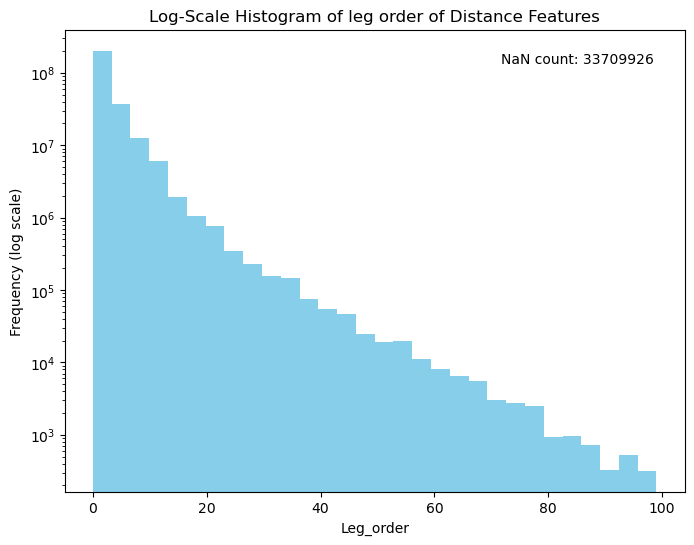

In [12]:
## Distance table plot Data distribution
plt.figure(figsize=(8, 6))

plt.hist(df_nue_dis['leg_order'].dropna(), bins=30, color='skyblue', log=True)  # Use log=True to plot the y-axis on a logarithmic scale
plt.title('Log-Scale Histogram of leg order of Distance Features')
plt.xlabel('Leg_order')
plt.ylabel('Frequency (log scale)')

nan_count = df_nue_dis['leg_order'].isna().sum()

plt.text(0.95, 0.95, f'NaN count: {nan_count}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()

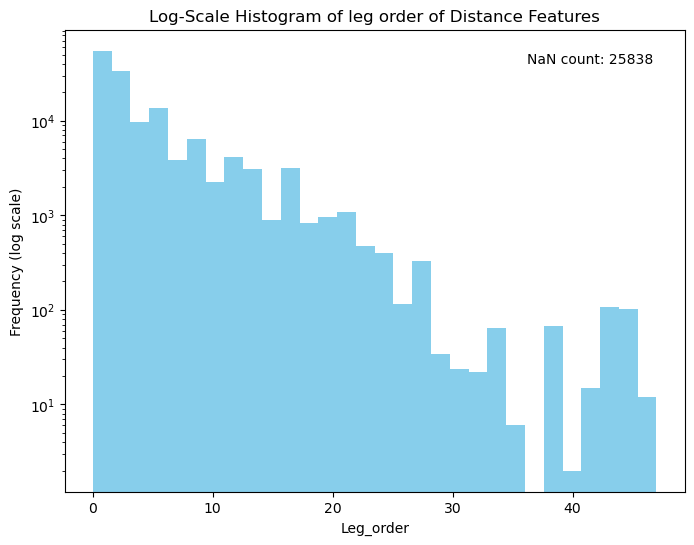

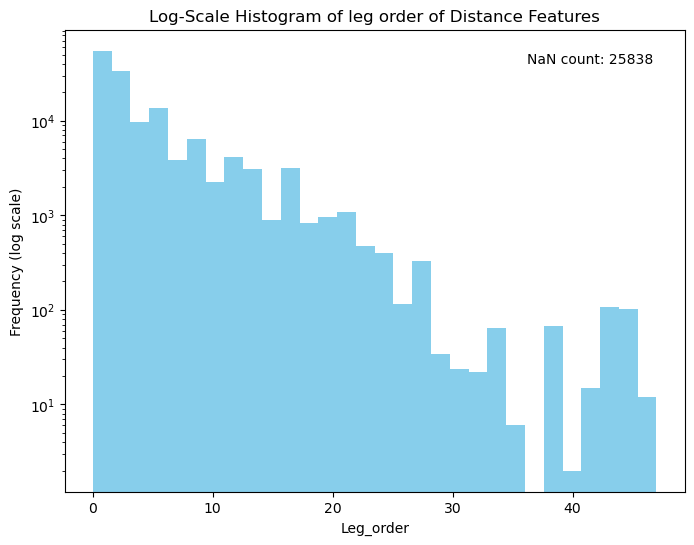

In [18]:
plt.figure(figsize=(8, 6))

plt.hist(df_nue_dis['leg_order'].dropna(), bins=30, color='skyblue', log=True)  # Use log=True to plot the y-axis on a logarithmic scale
plt.title('Log-Scale Histogram of leg order of Distance Features')
plt.xlabel('Leg_order')
plt.ylabel('Frequency (log scale)')

nan_count = df_nue_dis['leg_order'].isna().sum()

plt.text(0.95, 0.95, f'NaN count: {nan_count}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()

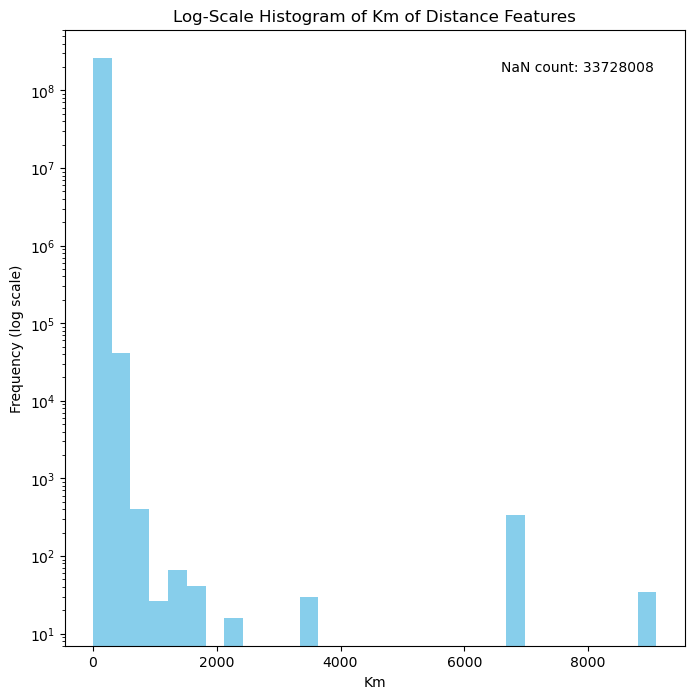

In [13]:
plt.figure(figsize=(8, 8))

plt.hist(df_nue_dis['km'].dropna(), bins=30, color='skyblue', log=True)  # Use log=True to plot the y-axis on a logarithmic scale
plt.title('Log-Scale Histogram of Km of Distance Features')
plt.xlabel('Km')
plt.ylabel('Frequency (log scale)')

nan_count = df_nue_dis['km'].isna().sum()

plt.text(0.95, 0.95, f'NaN count: {nan_count}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()

Empty DataFrame
Columns: [leg_order, km]
Index: []


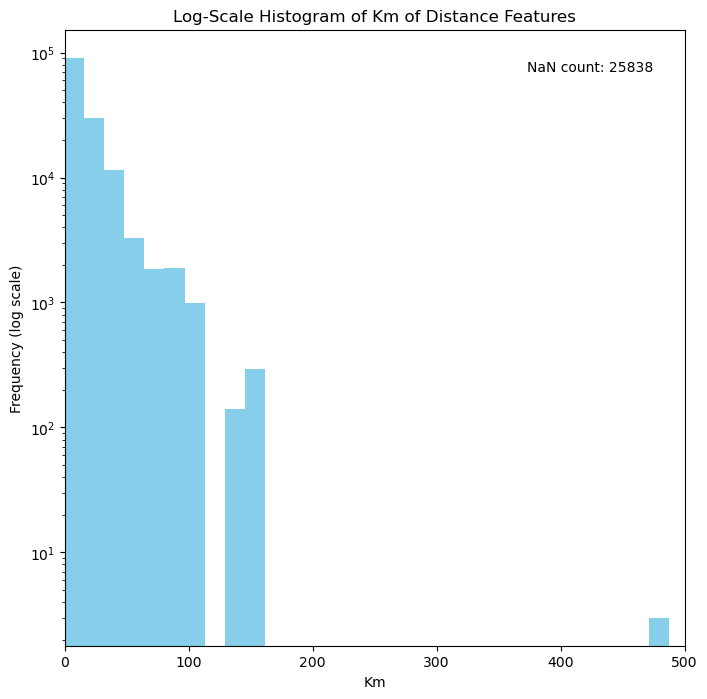

In [10]:
# Ensure 'km' is numeric and handle any non-numeric values
df_nue_dis['km'] = pd.to_numeric(df_nue_dis['km'], errors='coerce')

# Check for outliers
outliers = df_nue_dis[df_nue_dis['km'] > 487.3]
print(outliers)  # This will help to see if there are any unexpected large values

# Plot with corrected data
plt.figure(figsize=(8, 8))

plt.hist(df_nue_dis['km'].dropna(), bins=30, color='skyblue', log=True)  # Use log=True to plot the y-axis on a logarithmic scale
plt.title('Log-Scale Histogram of Km of Distance Features')
plt.xlabel('Km')
plt.ylabel('Frequency (log scale)')

# Ensure x-axis is limited to reasonable values
plt.xlim(0, 500)  # Set the limit based on your max value

# Display the NaN count on the plot
nan_count = df_nue_dis['km'].isna().sum()
plt.text(0.95, 0.95, f'NaN count: {nan_count}', ha='right', va='top', transform=plt.gca().transAxes)

plt.show()


In [2]:
## Pubtrans table
numerical_columns = ['distances_id', 'latitude_start', 'longitude_start', 'stopcode_start']
#不要'vehicle_ref', 因为他是无法被转为int 或者 float的类型

folder_path = '/scratch/work/lyub2/2.df_tc_09'
file_prefix = 'df_tc_'
file_suffix = '.csv'


df_nue_pub = pd.DataFrame()

for i in tqdm(range(1, 31), desc="Processing folders"):
    file_name = f'{file_prefix}{i:02d}{file_suffix}'
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file
    df_tc = pd.read_csv(file_path)
    
    df_nue_pub = pd.concat([df_nue_pub, df_tc[numerical_columns]], ignore_index=True)



Processing folders:   0%|          | 0/30 [00:00<?, ?it/s]

/tmp/ipykernel_799001/2962168734.py:17: DtypeWarning: Columns (13,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tc = pd.read_csv(file_path)


In [5]:
df_nue_pub.to_csv('/scratch/work/lyub2/Problem_output_September/P1/df_nue_pub.csv', index = False)

0it [00:00, ?it/s]

ValueError: num must be an integer with 1 <= num <= 3, not 4

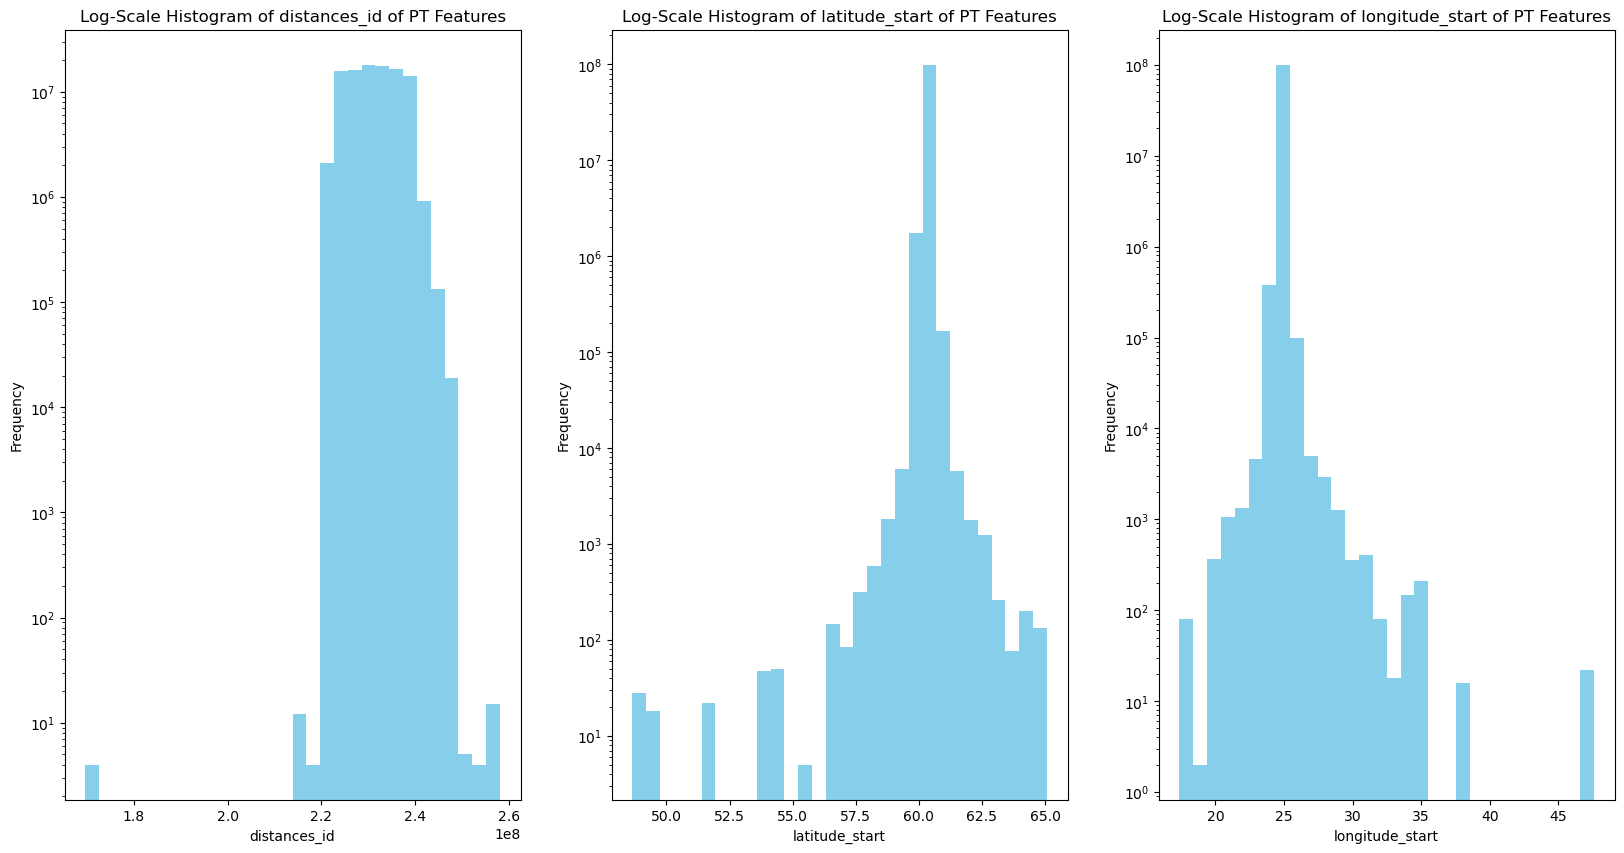

In [3]:
## Pubtrans table plot Data distribution
plt.figure(figsize=(20, 10))

for i, col in tqdm(enumerate(numerical_columns, 1)):
    plt.subplot(1, 3, i)
    plt.hist(df_nue_pub[col].dropna(), bins=30, color='skyblue', log=True)  # Use log=True to plot the y-axis on a logarithmic scale
    plt.title(f'Log-Scale Histogram of {col} of PT Features')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

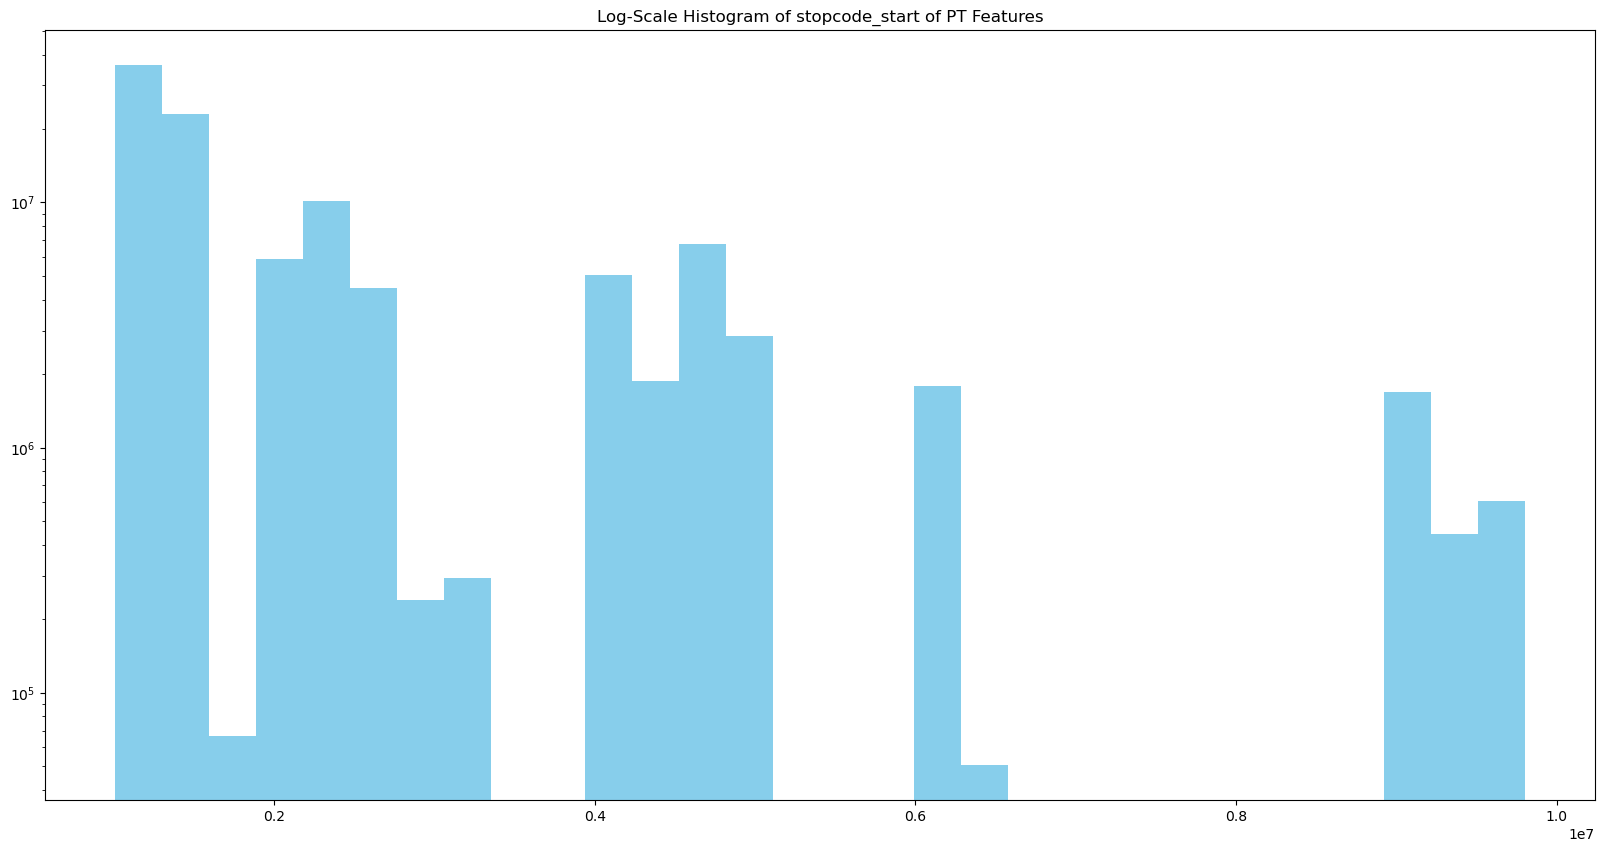

In [4]:
plt.figure(figsize=(20, 10))
plt.hist(df_nue_pub['stopcode_start'].dropna(), bins=30, color='skyblue', log=True)
plt.title('Log-Scale Histogram of stopcode_start of PT Features')
plt.show()

In [38]:
def convert_time_columns_to_Helsinki_datetime(df):
    for column in df.columns:
        if column.startswith('time'):
            # errors='coerce' will handle invalid parsing by setting NaT
            df[column] = pd.to_datetime(df[column], errors='coerce')
            df[column] = pd.to_datetime(df[column], errors='coerce', infer_datetime_format=True).dt.tz_convert('Europe/Helsinki') 
    return df

In [39]:
convert_time_columns_to_Helsinki_datetime(df_nue)

/tmp/ipykernel_783267/1312891617.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[column] = pd.to_datetime(df[column], errors='coerce')
/tmp/ipykernel_783267/1312891617.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[column] = pd.to_datetime(df[column], errors='coerce', infer_datetime_format=True).dt.tz_convert('Europe/Helsinki')


,leg_order,id,km,time_start_distance
0,NaN,NaN,NaN,NaT
1,NaN,NaN,NaN,NaT
2,NaN,NaN,NaN,NaT
3,NaN,NaN,NaN,NaT
4,NaN,NaN,NaN,NaT
...,...,...,...,...
297629269,NaN,NaN,NaN,NaT
297629270,NaN,NaN,NaN,NaT
297629271,NaN,NaN,NaN,NaT
297629272,NaN,NaN,NaN,NaT


In [ ]:
# 1. Log-transformation and plotting histograms
plt.figure(figsize=(20, 10))

for i, col in tqdm(enumerate(numerical_columns, 1)):
    plt.subplot(1, 3, i)
    plt.hist(df_nue[col].dropna(), bins=30, color='skyblue', log=True)  # Use log=True to plot the y-axis on a logarithmic scale
    plt.title(f'Log-Scale Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 时间

In [5]:
def convert_time_columns_to_Helsinki_datetime(df):
    for column in df.columns:
        if column.startswith('time'):
            # errors='coerce' will handle invalid parsing by setting NaT
            df[column] = pd.to_datetime(df[column], errors='coerce')
            df[column] = pd.to_datetime(df[column], errors='coerce', infer_datetime_format=True).dt.tz_convert('Europe/Helsinki') 
    return df

In [15]:
folder_path = '/scratch/work/lyub2/2.df_tc_09'
file_prefix = 'df_tc_'
file_suffix = '.csv'

# Initialize dictionaries to keep track of counts
hour_counts = {'start_hour': {i: 0 for i in range(24)}, 'end_hour': {i: 0 for i in range(24)}}
hour_counts['start_hour']['NaN'] = 0
hour_counts['end_hour']['NaN'] = 0

day_counts = {'start_day': {day: 0 for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']},
              'end_day': {day: 0 for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}}
day_counts['start_day']['NaN'] = 0
day_counts['end_day']['NaN'] = 0

# Function to update counts based on the column values
def update_counts(df, column_name, hour_key, day_key):
    # Extract hour and day name
    df['hour'] = df[column_name].dt.hour
    df['day'] = df[column_name].dt.day_name()

    # Update hour counts
    hour_count_series = df['hour'].value_counts(dropna=False)
    for hour, count in hour_count_series.items():
        if pd.notna(hour):
            hour_counts[hour_key][hour] += count
        else:
            hour_counts[hour_key]['NaN'] += count

    # Update day counts
    day_count_series = df['day'].value_counts(dropna=False)
    for day, count in day_count_series.items():
        if pd.notna(day):
            day_counts[day_key][day] += count
        else:
            day_counts[day_key]['NaN'] += count

# Process each CSV file
for i in tqdm(range(1, 31), desc="Processing files"):
    file_name = f'{file_prefix}{i:02d}{file_suffix}'
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, usecols=['time_start_distance','time_end_distance'])

    # Convert columns to datetime and localize to Helsinki time
    df = convert_time_columns_to_Helsinki_datetime(df)

    # Update counts for 'time_start_distance'
    update_counts(df, 'time_start_distance', 'start_hour', 'start_day')
    
    # Update counts for 'time_end_distance'
    update_counts(df, 'time_end_distance', 'end_hour', 'end_day')

# Convert dictionaries to DataFrames for final output
dis_hour = pd.DataFrame({
    'start_hour': list(hour_counts['start_hour'].keys()),
    'start_hour_count': list(hour_counts['start_hour'].values()),
    'end_hour': list(hour_counts['end_hour'].keys()),
    'end_hour_count': list(hour_counts['end_hour'].values())
})

dis_day = pd.DataFrame({
    'start_day': list(day_counts['start_day'].keys()),
    'start_day_count': list(day_counts['start_day'].values()),
    'end_day': list(day_counts['end_day'].keys()),
    'end_day_count': list(day_counts['end_day'].values())
})


Processing files:   0%|          | 0/2 [00:00<?, ?it/s]/tmp/ipykernel_3757620/1312891617.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[column] = pd.to_datetime(df[column], errors='coerce', infer_datetime_format=True).dt.tz_convert('Europe/Helsinki')
/tmp/ipykernel_3757620/1312891617.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[column] = pd.to_datetime(df[column], errors='coerce', infer_datetime_format=True).dt.tz_convert('Europe/Helsinki')
Processing files:  50%|█████     | 1/2 [00:33<00:33, 33.45s/it]/tmp/ipykernel_3757620/1312891617.py

In [11]:
dis_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_hour        24 non-null     float64
 1   start_hour_count  25 non-null     int64  
 2   end_hour          24 non-null     float64
 3   end_hour_count    25 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 932.0 bytes


In [13]:
dis_hour.to_csv('/scratch/work/lyub2/Problem_output_September/P1/dis_hour.csv', index = False)

In [10]:
dis_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   start_day        7 non-null      object
 1   start_day_count  8 non-null      int64 
 2   end_day          7 non-null      object
 3   end_day_count    8 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 388.0+ bytes


In [14]:
dis_day.to_csv('/scratch/work/lyub2/Problem_output_September/P1/dis_day.csv', index = False)

### 打开时间的

In [27]:
dis_hour = pd.read_csv("/scratch/work/lyub2/Problem_output_September/P1/dis_hour.csv")

In [26]:
dis_day = pd.read_csv("/scratch/work/lyub2/Problem_output_September/P1/dis_day.csv")

### Plot

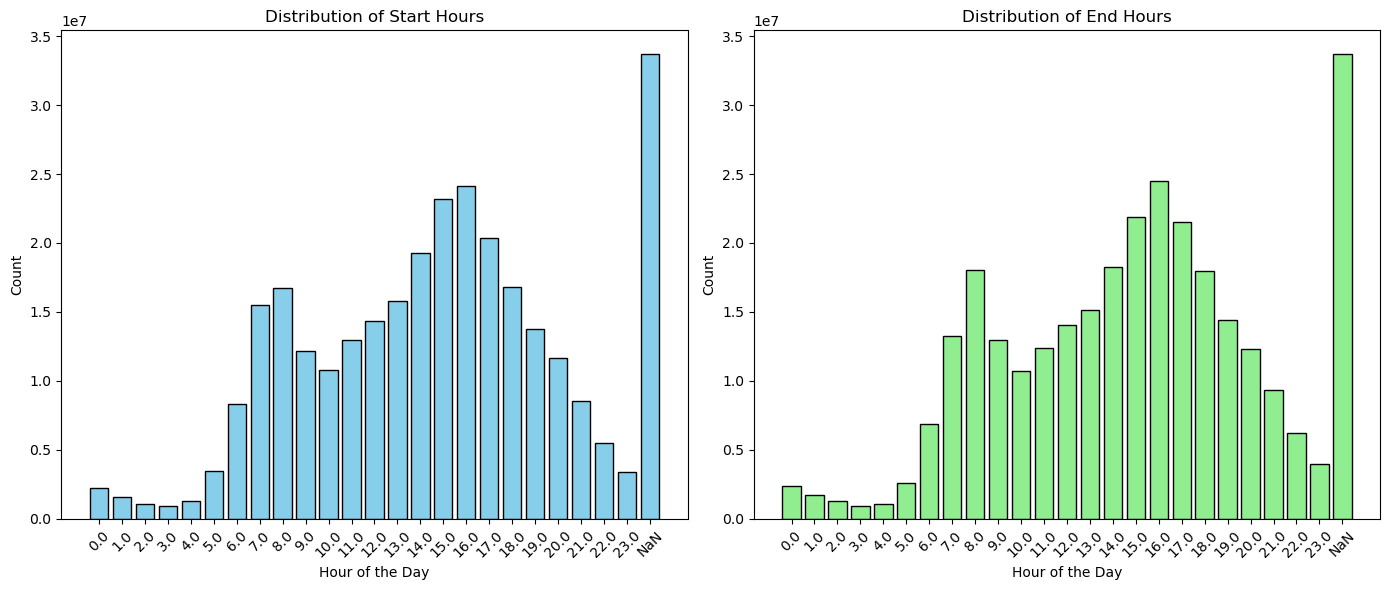

In [17]:
# Replace NaN values with the string 'NaN'
dis_hour['start_hour'] = dis_hour['start_hour'].fillna('NaN')
dis_hour['end_hour'] = dis_hour['end_hour'].fillna('NaN')

# Convert the hour columns to string to ensure they are treated as categorical data in the plot
dis_hour['start_hour'] = dis_hour['start_hour'].astype(str)
dis_hour['end_hour'] = dis_hour['end_hour'].astype(str)

# Plotting hour distributions
plt.figure(figsize=(14, 6))

# Start hour distribution
plt.subplot(1, 2, 1)
plt.bar(dis_hour['start_hour'], dis_hour['start_hour_count'], color='skyblue', edgecolor='black')
plt.title('Distribution of Start Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate for better readability

# End hour distribution
plt.subplot(1, 2, 2)
plt.bar(dis_hour['end_hour'], dis_hour['end_hour_count'], color='lightgreen', edgecolor='black')
plt.title('Distribution of End Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


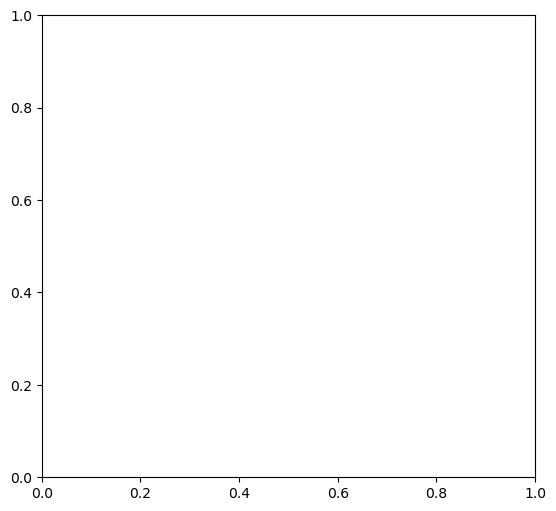

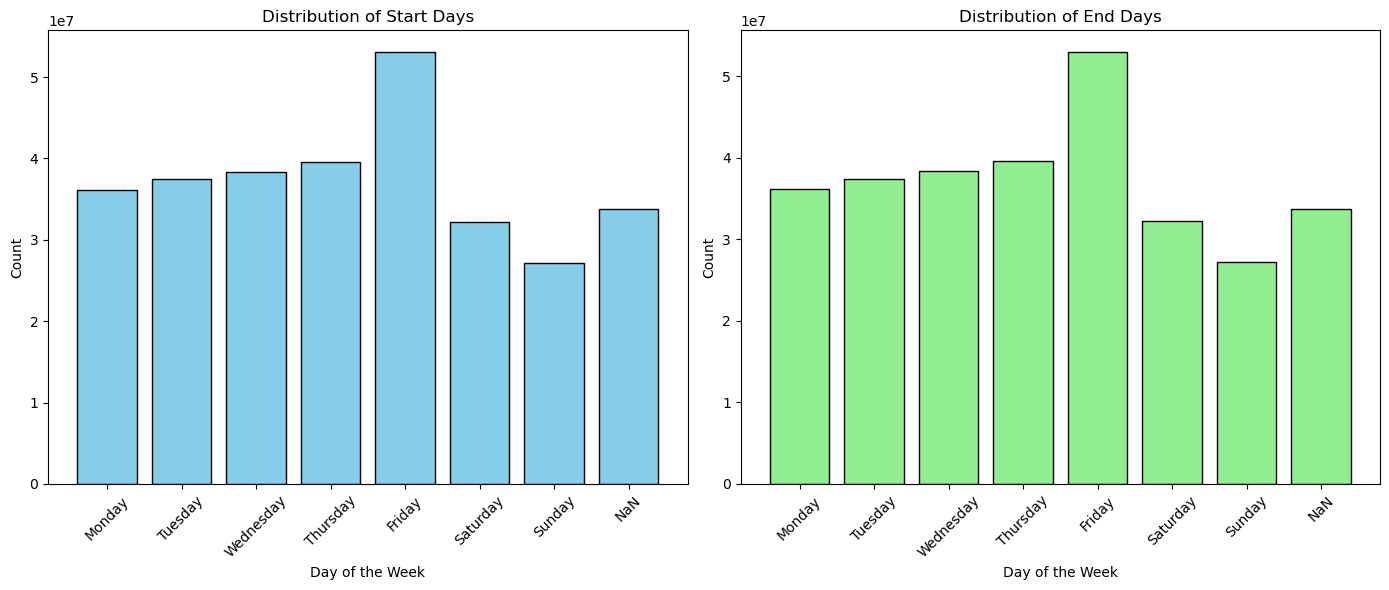

In [16]:
dis_day['start_day'] = dis_day['start_day'].fillna('NaN')
dis_day['end_day'] = dis_day['end_day'].fillna('NaN')

# Plotting day distributions
plt.figure(figsize=(14, 6))

# Start day distribution
plt.subplot(1, 2, 1)
plt.bar(dis_day['start_day'], dis_day['start_day_count'], color='skyblue', edgecolor='black')
plt.title('Distribution of Start Days')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate day names for better readability

# End day distribution
plt.subplot(1, 2, 2)
plt.bar(dis_day['end_day'], dis_day['end_day_count'], color='lightgreen', edgecolor='black')
plt.title('Distribution of End Days')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate day names for better readability

plt.tight_layout()
plt.show()

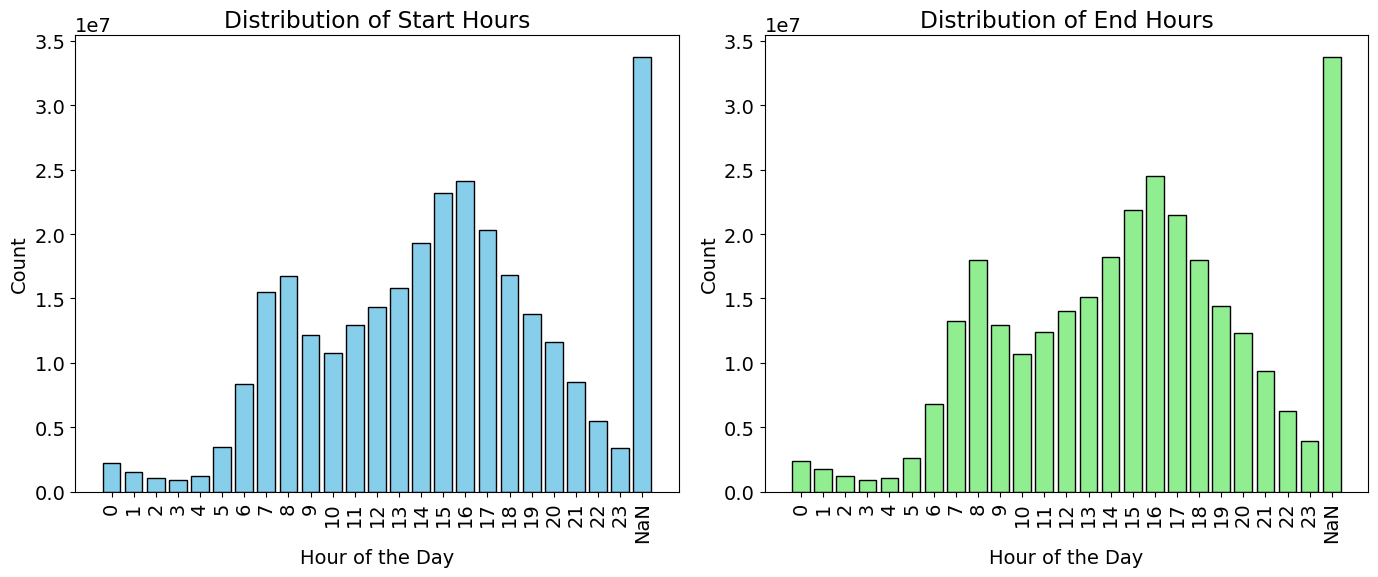

In [55]:
# Set global font size
plt.rcParams.update({'font.size': 14})  # Adjust the size as needed

dis_hour['start_hour'] = dis_hour['start_hour'].fillna('NaN')
dis_hour['end_hour'] = dis_hour['end_hour'].fillna('NaN')

# Convert the hour columns to string to ensure they are treated as categorical data in the plot
dis_hour['start_hour'] = dis_hour['start_hour'].astype(str)
dis_hour['end_hour'] = dis_hour['end_hour'].astype(str)

start_hours = [int(float(x)) if x != 'NaN' else 'NaN' for x in dis_hour['start_hour'].unique()]
end_hours = [int(float(x)) if x != 'NaN' else 'NaN' for x in dis_hour['end_hour'].unique()]

# Plotting hour distributions
plt.figure(figsize=(14, 6))

# Start hour distribution
plt.subplot(1, 2, 1)
plt.bar(dis_hour['start_hour'], dis_hour['start_hour_count'], color='skyblue', edgecolor='black')
plt.title('Distribution of Start Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(ticks=list(range(0, 24)) + [24], labels=[str(i) for i in range(24)] + ['NaN'], rotation = 90)

# End hour distribution
plt.subplot(1, 2, 2)
plt.bar(dis_hour['end_hour'], dis_hour['end_hour_count'], color='lightgreen', edgecolor='black')
plt.title('Distribution of End Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(ticks=list(range(0, 24)) + [24], labels=[str(i) for i in range(24)] + ['NaN'], rotation = 90)

plt.tight_layout()
plt.show()



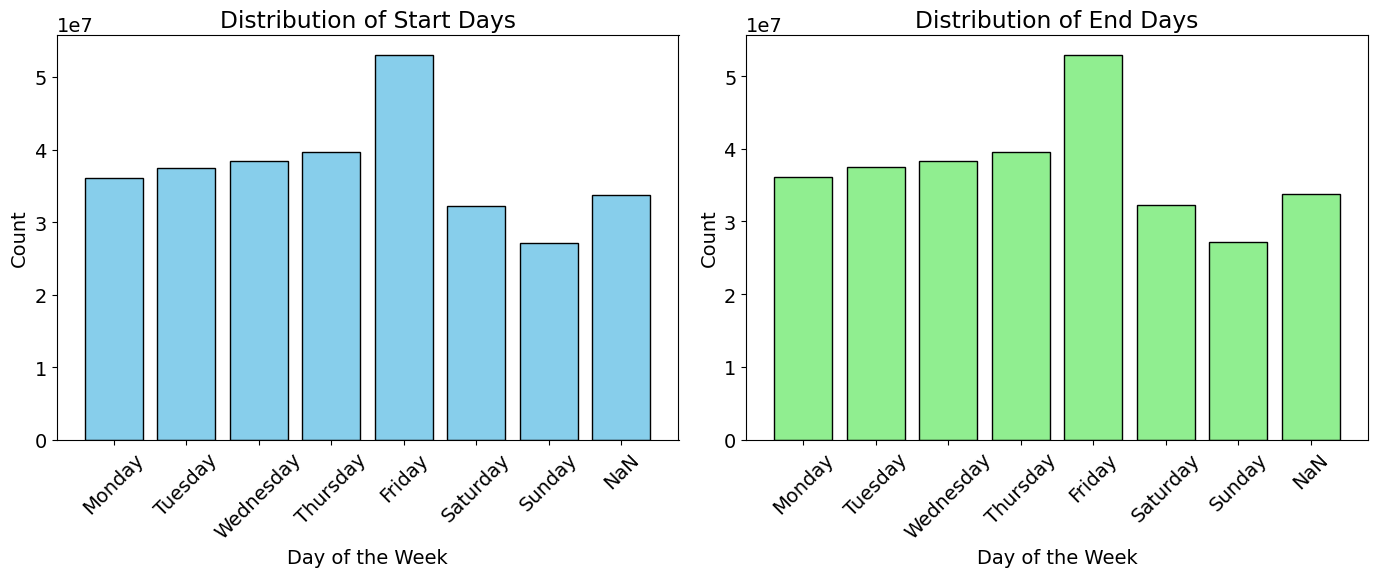

In [56]:
dis_day['start_day'] = dis_day['start_day'].fillna('NaN')
dis_day['end_day'] = dis_day['end_day'].fillna('NaN')

plt.rcParams.update({'font.size': 14})

# Plotting day distributions
plt.figure(figsize=(14, 6))

# Start day distribution
plt.subplot(1, 2, 1)
plt.bar(dis_day['start_day'], dis_day['start_day_count'], color='skyblue', edgecolor='black')
plt.title('Distribution of Start Days')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate day names for better readability

# End day distribution
plt.subplot(1, 2, 2)
plt.bar(dis_day['end_day'], dis_day['end_day_count'], color='lightgreen', edgecolor='black')
plt.title('Distribution of End Days')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate day names for better readability

plt.tight_layout()
plt.show()

### category 类型的

In [2]:
folder_path = '/scratch/work/lyub2/2.df_tc_09'
file_prefix = 'df_tc_'
file_suffix = '.csv'

# List of categorical columns to analyze
category_columns = ['activity', 'operatingSystem', 'beaconsAvailable', 'locationAvailable']

# Initialize a dictionary to store Series for each categorical column
category_data = {col: pd.Series(dtype=int) for col in category_columns}

# Loop through each file and process
for i in tqdm(range(1, 31)):
    file_name = f'{file_prefix}{i:02d}{file_suffix}'
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file
    df = pd.read_csv(file_path, usecols= category_columns)
    
    # Aggregate the categorical column values
    for col in category_columns:
        category_data[col] = pd.concat([category_data[col], df[col]], ignore_index=True)


  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [19:14<00:00, 38.48s/it]


In [3]:
category_df = pd.DataFrame(category_data)
category_df.head()

: 

In [ ]:
category_df.to_csv('/scratch/work/lyub2/Problem_output_September/P1/category_df.csv')

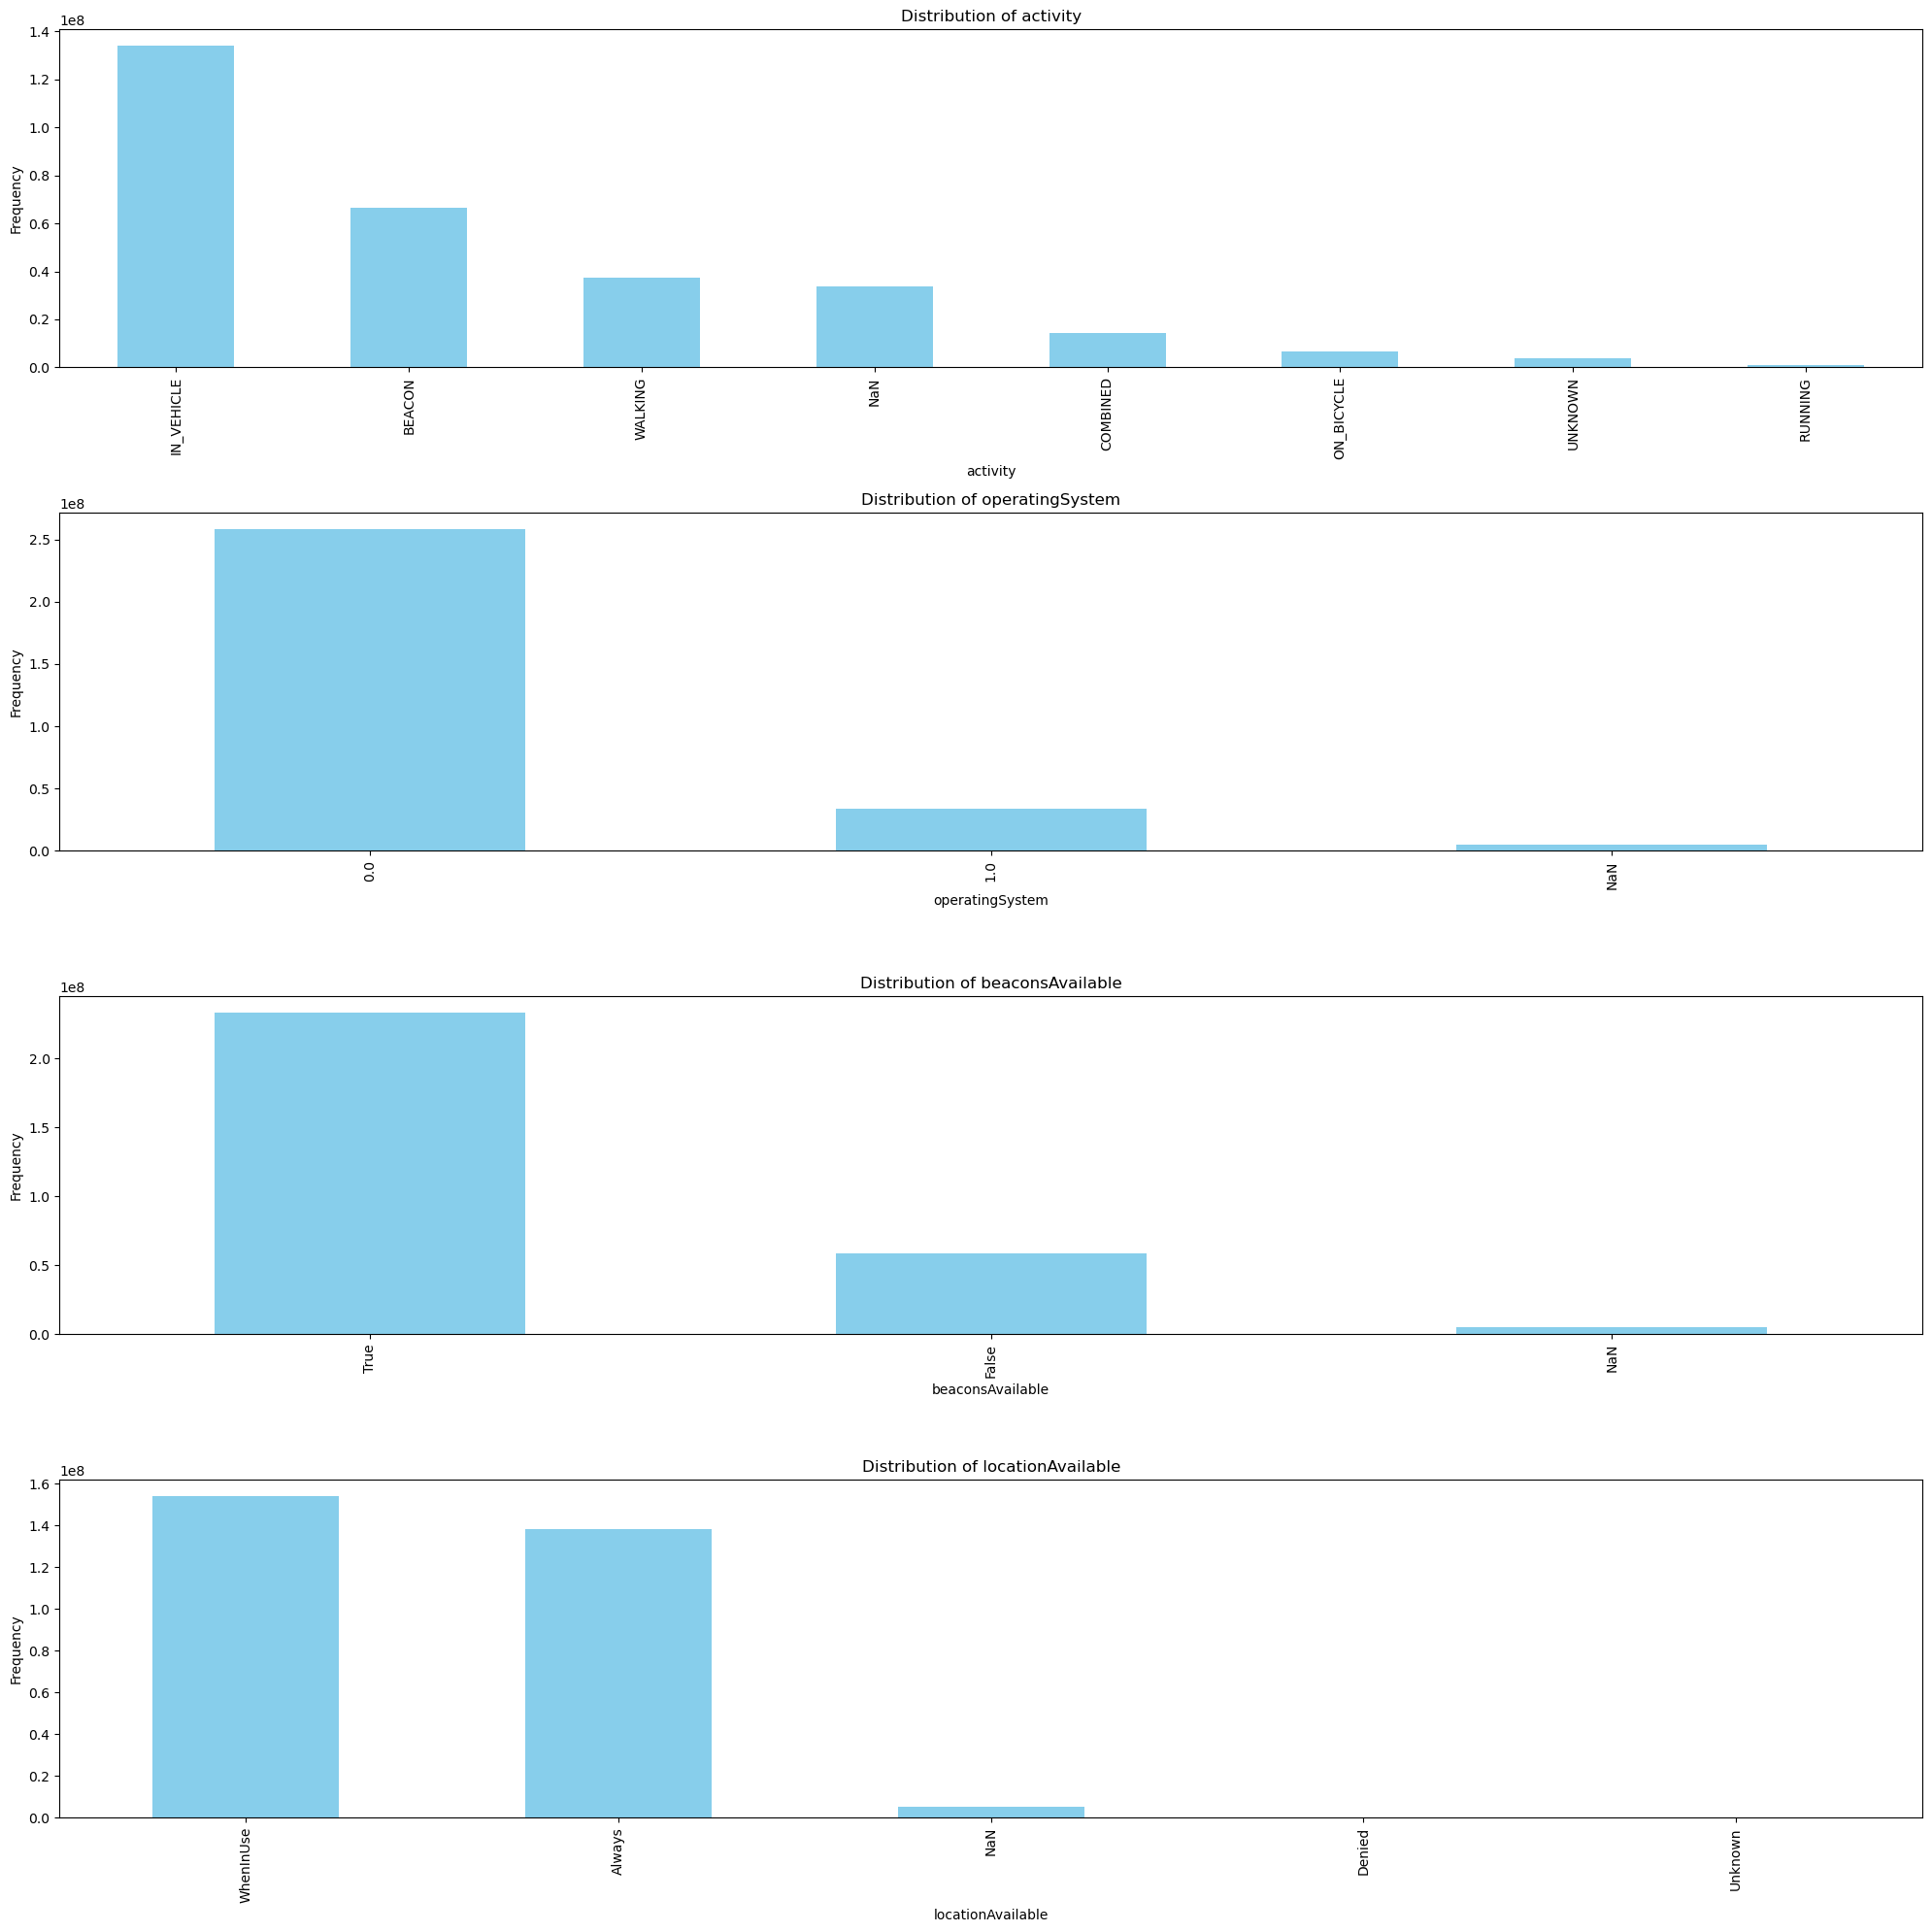

In [3]:
# Plotting the distribution of categorical columns
n_columns = len(category_columns)
plt.figure(figsize=(20, 5 * n_columns))

for i, col in enumerate(category_columns, 1):
    plt.subplot(n_columns, 1, i)
    
    # Count the frequency of each category
    counts = category_data[col].value_counts(dropna=False)
    counts.index = counts.index.fillna('NaN')
    
    # Plotting
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

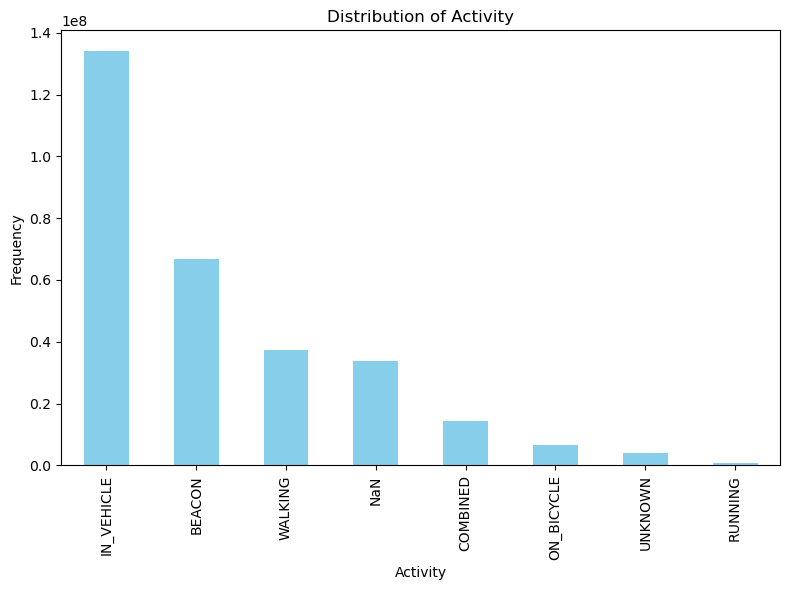

In [7]:
plt.figure(figsize=(8, 6))
counts = category_data['activity'].value_counts(dropna=False)
counts.index = counts.index.fillna('NaN')
    
# Plotting
counts.plot(kind='bar', color='skyblue')
plt.title(f'Distribution of Activity')
plt.xlabel('Activity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 重新调试 numerical 

In [21]:
## distance table
numerical_columns = ['leg_order', 'km']

folder_path = '/scratch/work/lyub2/2.df_tc_09'
file_prefix = 'df_tc_'
file_suffix = '.csv'


df_nue_dis = pd.DataFrame()

for i in tqdm(range(1, 31), desc="Processing folders"):
    file_name = f'{file_prefix}{i:02d}{file_suffix}'
    file_path = os.path.join(folder_path, file_name)
    
    # Read the CSV file
    df_tc = pd.read_csv(file_path, usecols = numerical_columns)
    
    df_nue_dis = pd.concat([df_nue_dis, df_tc[numerical_columns]], ignore_index=True)

Processing folders: 100%|██████████| 30/30 [41:56<00:00, 83.90s/it] 


In [22]:
df_km= df_nue_dis[['km']]

max_km = df_km['km'].max()
max_km

np.float64(9103.7)

In [24]:
df_km['km'].describe()

count    2.639013e+08
mean     1.388615e+01
std      2.422093e+01
min     -1.000000e+00
25%      2.100000e+00
50%      7.500000e+00
75%      1.580000e+01
max      9.103700e+03
Name: km, dtype: float64

In [23]:
df_km.value_counts()

km        
0.500000      42182537
1.000000       2762530
1.100000       2021051
1.500000       2017493
1.200000       1886847
                ...   
543.000000           1
191.800003           1
490.600000           1
616.100000           1
344.100000           1
Name: count, Length: 10341, dtype: int64

In [ ]:
df_km['km'].max()

np.float64(88.6)

In [25]:
plt.figure(figsize=(8, 8))

plt.hist(df_km['km'].dropna(), bins=30, color='skyblue', log=True)  # Use log=True to plot the y-axis on a logarithmic scale
plt.title('Log-Scale Histogram of Km of Distance Features')
plt.xlabel('Km')
plt.ylabel('Frequency (log scale)')

nan_count = df_km['km'].isna().sum()

plt.text(0.95, 0.95, f'NaN count: {nan_count}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()

KeyboardInterrupt: 